In [148]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
import copy
import os as so
import numpy as ny
from os import path
import pandas as ps
import pathlib as pb
from typing import List
import matplotlib.pyplot as pt
from modules import processing as pg
from numpy.random import default_rng


# Configure the paths to the data files
ROOT_PATH = pb.Path('..')
DATASET_PATH = pb.Path(path.join(ROOT_PATH, 'data'))
DATASET_TEST_PATH = pb.Path(path.join(DATASET_PATH, 'test'))
DATASET_TRAIN_PATH = pb.Path(path.join(DATASET_PATH, 'train'))
SUBMISSIONS_PATH = pb.Path(path.join(ROOT_PATH, 'submissions'))
DATASET_TRAIN_LABELS_FILEPATH = pb.Path(path.join(DATASET_PATH, 'train_labels.csv'))

In [150]:
# Load the data from disk
dataset = pg.Dataset(DATASET_PATH)

Number of training samples:  9000
Shape of a training sample:  (150, 3)
Number of testing samples:  5000
Shape of a testing sample:  (150, 3)


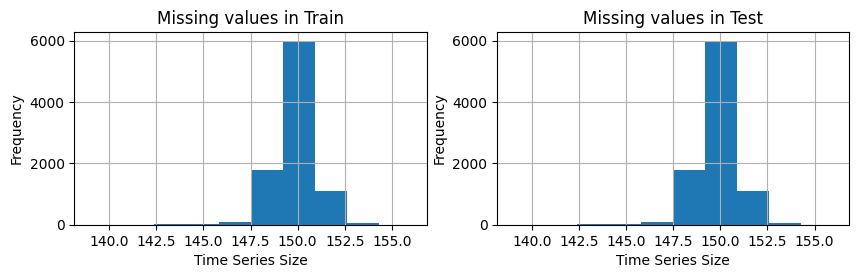

In [151]:
# Compute sizes in order to search for potential missing values in each time series
train_sizes = [sample.shape[0] for sample in dataset.train_data]
test_sizes = [sample.shape[0] for sample in dataset.train_data]

# Display missing value stats
pt.figure(figsize=(10, 2.5))
for i, (sizes, title) in enumerate([(train_sizes, 'train'), (test_sizes, 'test')]):
  pt.subplot(1, 2, i + 1)
  pt.title(f'Missing values in {title.capitalize()}')
  pt.xlabel('Time Series Size')
  pt.ylabel('Frequency')
  pt.hist(sizes)
  pt.grid(True)

In [152]:
train_data = dataset.to_pandas()
train_data

,id,x,y,z,label
0,0,-0.767342,4.330513,7.996035,7
1,0,-0.826000,4.371214,7.986458,7
2,0,-0.819415,4.401740,8.008605,7
3,0,-0.809240,4.446631,8.027160,7
4,0,-0.798466,4.450222,8.033744,7
...,...,...,...,...,...
1348950,8999,0.740407,5.185841,7.296928,18
1348951,8999,0.808642,5.205593,7.309498,18
1348952,8999,0.864905,5.319318,7.308899,18
1348953,8999,0.807445,5.356428,7.321469,18


In [153]:
for i in range(1, 21):
  print(train_data.loc[(train_data[['label']] == i)['label']]['id'].unique().size)

450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450
450


In [154]:
train_data.describe()

,id,x,y,z,label
count,1.348955e+06,1.348955e+06,1.348955e+06,1.348955e+06,1.348955e+06
mean,4.499380e+03,-2.151555e-01,4.731727e+00,8.017973e+00,1.049964e+01
std,2.597994e+03,8.352723e-01,1.205409e+00,1.060832e+00,5.766173e+00
min,0.000000e+00,-7.778163e+00,-6.853400e-01,1.212663e+00,1.000000e+00
25%,2.250000e+03,-7.314290e-01,3.876213e+00,7.340024e+00,5.000000e+00
50%,4.499000e+03,-2.184710e-01,4.532822e+00,8.043920e+00,1.000000e+01
75%,6.749000e+03,3.351880e-01,5.391742e+00,8.720282e+00,1.500000e+01
max,8.999000e+03,7.284957e+00,1.104026e+01,1.581849e+01,2.000000e+01


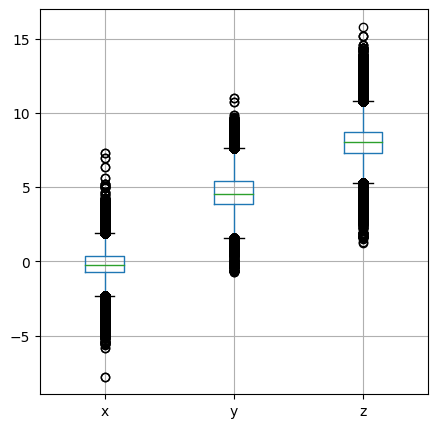

In [155]:
global_ax = train_data[['x', 'y', 'z']].boxplot(figsize=(5, 5))

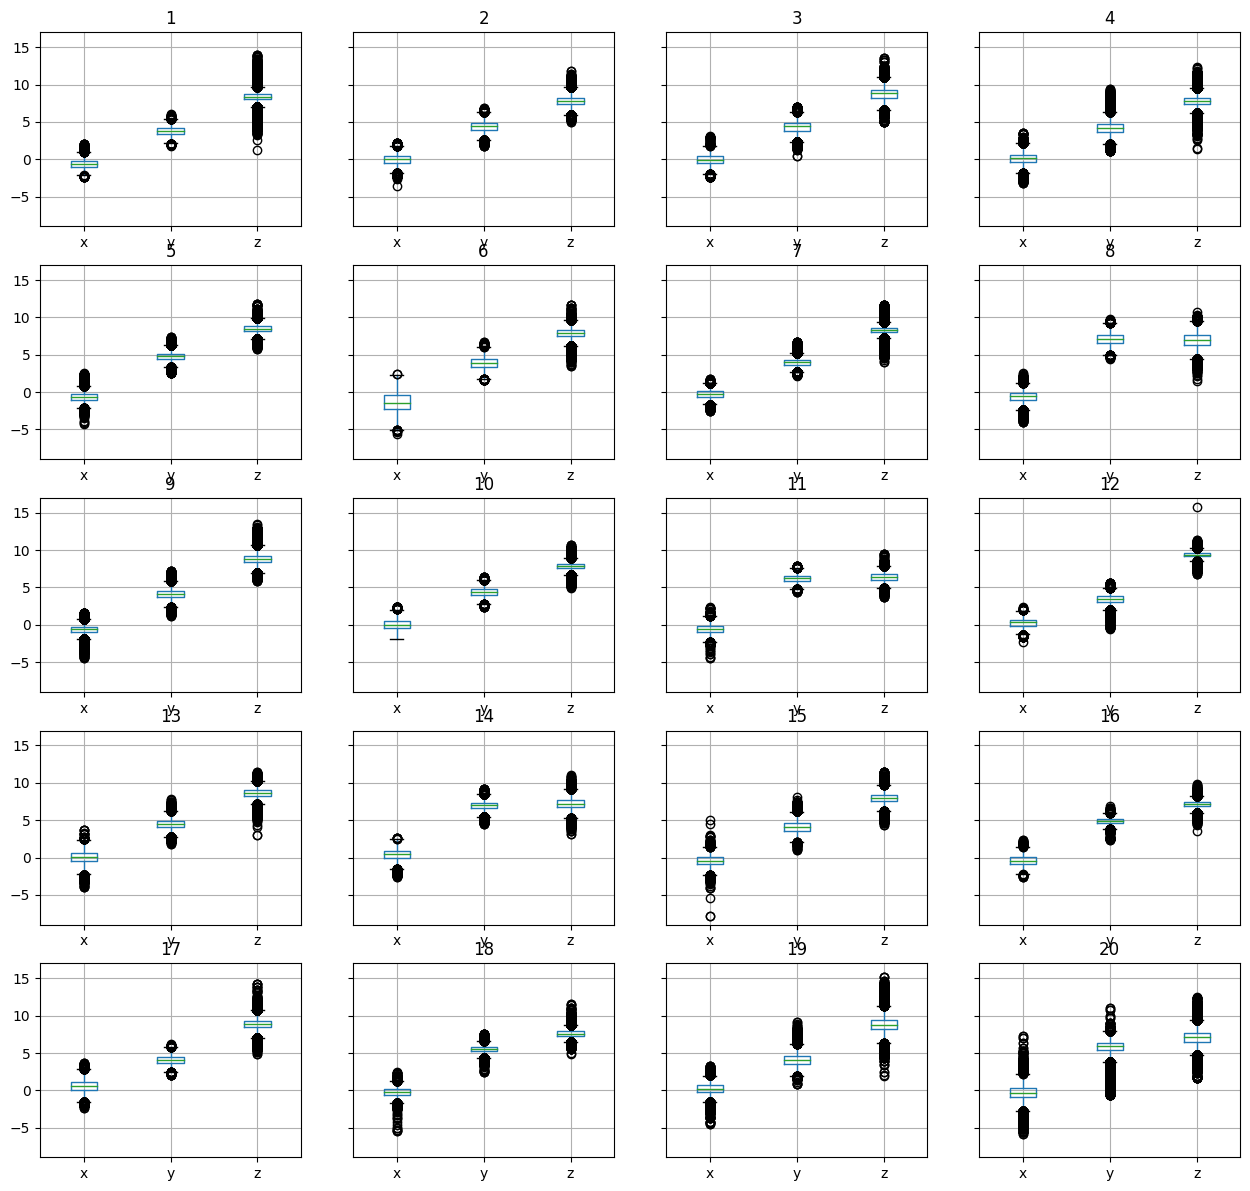

In [156]:
class_ax = train_data.groupby('label')[['x', 'y', 'z']].boxplot(figsize=(15, 15)).iloc[:3]

In [157]:
train_data.groupby('label')[['x', 'y', 'z']]

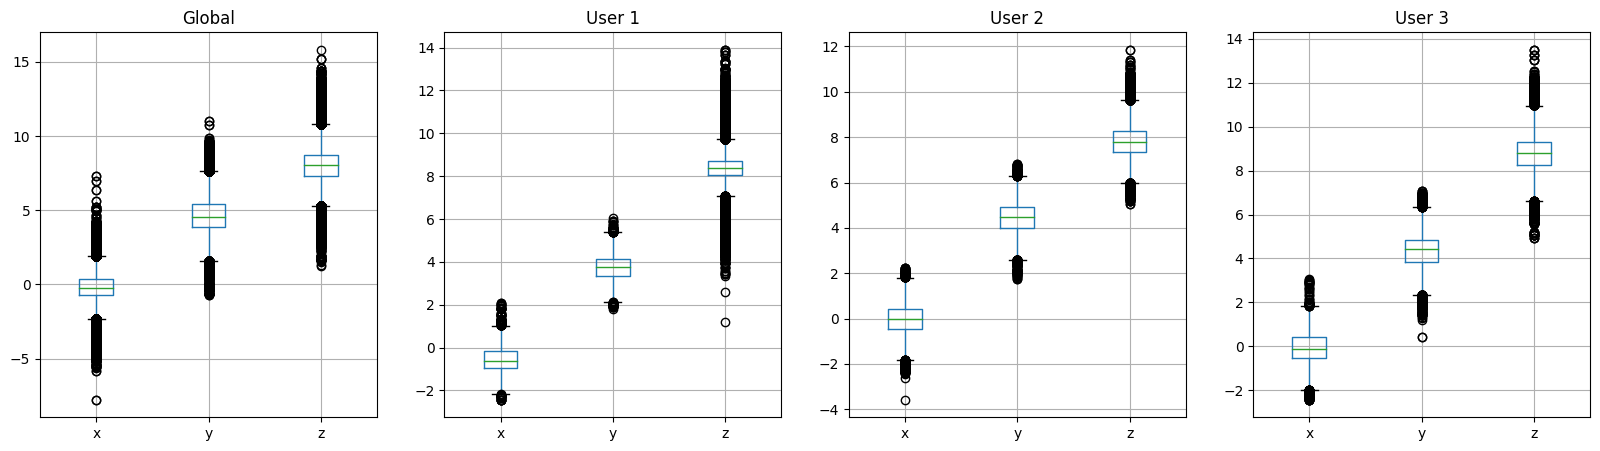

In [158]:
f, ax = pt.subplots(1, 4,  figsize=((20, 5)))

# Display global stats on first subplot
ax[0].set_title('Global')
train_data[['x', 'y', 'z']].boxplot(ax=ax[0])

# Display class stats on the other subplots
for (i, group) in train_data.groupby('label')[['x', 'y', 'z']]:
  if i >= 4:
    break
  ax[i].set_title(f'User {i}')
  group.boxplot(ax=ax[i])

pt.show()

In [159]:
dataset.remove_outliers(by='global', factor=1.5)
train_data = dataset.to_pandas()

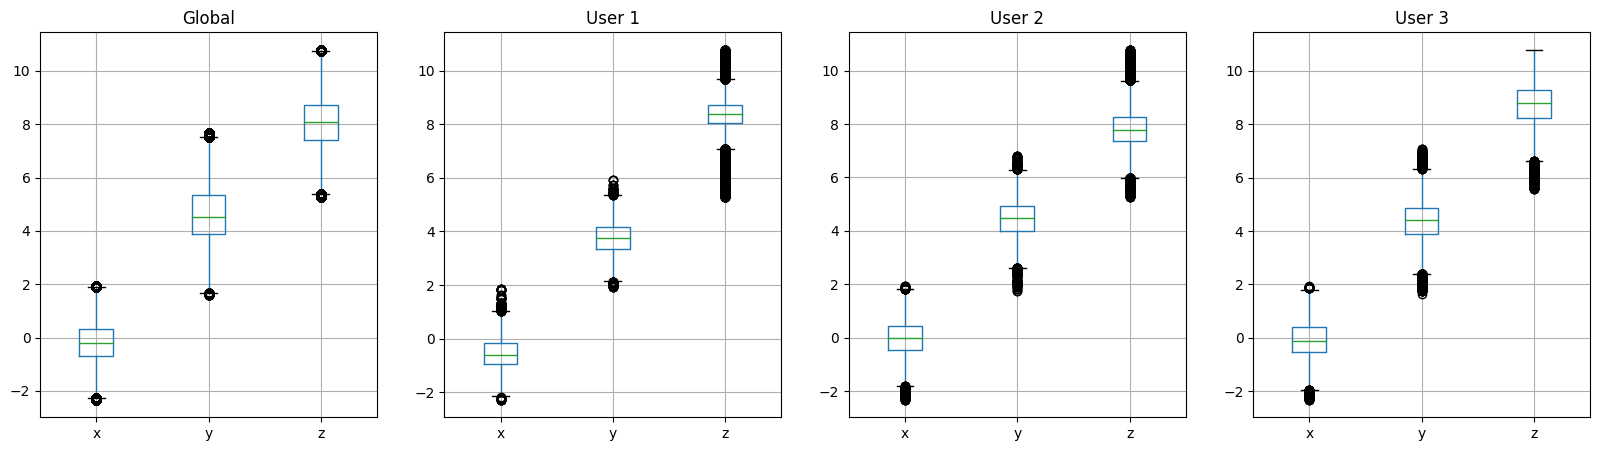

In [160]:
f, ax = pt.subplots(1, 4,  figsize=((20, 5)))

# Display global stats on first subplot
ax[0].set_title('Global')
train_data[['x', 'y', 'z']].boxplot(ax=ax[0])

# Display class stats on the other subplots
for (i, group) in train_data.groupby('label')[['x', 'y', 'z']]:
  if i >= 4:
    break
  ax[i].set_title(f'User {i}')
  group.boxplot(ax=ax[i])

pt.show()